# Pandas Tutorial

Credits: The following are notes taken while working through [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793) by Wes McKinney

* Series
* DataFrame
* Dropping Entries
* Indexing, Selecting, Filtering
* Summarizing and Computing Descriptive Statistics
* Split-apply-combine

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Series

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels.  The data can be any NumPy data type and the labels are the Series' index.

Create a Series:

In [2]:
ser_1 = Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Get the array (numpy) representation of a Series:

In [3]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13])

Index objects are immutable and hold the axis labels and metadata such as names and axis names.

Get the index of the Series:

In [4]:
ser_1.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

Create a Series with a custom index:

In [5]:
ser_2 = Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Get a value from a Series:

In [6]:
ser_2[4] == ser_2['e']

True

Get a set of values from a Series by passing in a list:

In [7]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

Get values great than 0:

In [8]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Get values between 0 and 1

In [9]:
ser_2[(ser_2 > 0) & (ser_2 <= 1)]

a    1
b    1
dtype: int64

Scalar multiply:

In [10]:
ser_2 * 2

a     2
b     2
c     4
d    -6
e   -10
dtype: int64

Apply a numpy math function:

In [11]:
np.exp(ser_2)

a    2.718282
b    2.718282
c    7.389056
d    0.049787
e    0.006738
dtype: float64

A Series is like a fixed-length, ordered dict.  

Create a series by passing in a dict:

In [12]:
dict_1 = {'foo' : 100, 'bar' : 200, 'baz' : 300}
ser_3 = Series(dict_1)
ser_3

bar    200
baz    300
foo    100
dtype: int64

In [13]:
ser_4 = Series({"bar": 200, "baz": 300, "foo": 100, "qux": 50})
ser_4

bar    200
baz    300
foo    100
qux     50
dtype: int64

Series automatically aligns differently indexed data in arithmetic operations:

In [14]:
ser_3 + ser_4

bar    400
baz    600
foo    200
qux    NaN
dtype: float64

Name a Series:

## DataFrame

A DataFrame is a tabular data structure containing an ordered collection of columns.  Each column can have a different type.  DataFrames have both row and column indices and is analogous to a dict of Series.  Row and column operations are treated roughly symmetrically.  Columns returned when indexing a DataFrame are views of the underlying data, not a copy.  To obtain a copy, use the Series' copy method.

Create a DataFrame:

In [15]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1)
df_1

,pop,state,year
0,5.0,VA,2012
1,5.1,VA,2013
2,5.2,VA,2014
3,4.0,MD,2014
4,4.1,MD,2015


Retrieve a column by key, returning a Series:


In [16]:
df_1['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Retrive a column by attribute, returning a Series:

In [17]:
df_1.year

0    2012
1    2013
2    2014
3    2014
4    2015
Name: year, dtype: int64

Retrieve a row by position:

In [18]:
df_1.ix[0]

pop         5
state      VA
year     2012
Name: 0, dtype: object

Update a column by assignment:

In [19]:
df_1['unempl'] = np.arange(5)
df_1

,pop,state,year,unempl
0,5.0,VA,2012,0
1,5.1,VA,2013,1
2,5.2,VA,2014,2
3,4.0,MD,2014,3
4,4.1,MD,2015,4


Assign a Series to a column (note if assigning a list or array, the length must match the DataFrame, unlike a Series):

In [20]:
unempl = Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_1['unempl'] = unempl
df_1

,pop,state,year,unempl
0,5.0,VA,2012,NaN
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6.0
3,4.0,MD,2014,6.0
4,4.1,MD,2015,6.1


Assign a new column that doesn't exist to create a new column:

In [21]:
df_1['state_dup'] = df_1['state']
df_1

,pop,state,year,unempl,state_dup
0,5.0,VA,2012,NaN,VA
1,5.1,VA,2013,NaN,VA
2,5.2,VA,2014,6.0,VA
3,4.0,MD,2014,6.0,MD
4,4.1,MD,2015,6.1,MD


Delete a column:

In [22]:
del df_1['state_dup']
df_1

,pop,state,year,unempl
0,5.0,VA,2012,NaN
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6.0
3,4.0,MD,2014,6.0
4,4.1,MD,2015,6.1


## Indexing, Selecting, Filtering

Series indexing is similar to NumPy array indexing with the added bonus of being able to use the Series' index values.

In [23]:
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Select a value from a Series:

In [24]:
ser_2[0] == ser_2['a']

True

Select a slice from a Series:

In [25]:
ser_2[1:4]

b    1
c    2
d   -3
dtype: int64

Select specific values from a Series:

In [26]:
ser_2[['b', 'c', 'd']]

b    1
c    2
d   -3
dtype: int64

Select from a Series based on a filter:

In [27]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Select a slice from a Series with labels (note the end point is inclusive):

In [28]:
ser_2['a':'b']

a    1
b    1
dtype: int64

Assign to a Series slice (note the end point is inclusive):

In [29]:
ser_2['a':'b'] = 0
ser_2

a    0
b    0
c    2
d   -3
e   -5
dtype: int64

Pandas supports indexing into a DataFrame.

In [30]:
df_1

,pop,state,year,unempl
0,5.0,VA,2012,NaN
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6.0
3,4.0,MD,2014,6.0
4,4.1,MD,2015,6.1


Select specified columns from a DataFrame:

In [31]:
df_1[['pop', 'unempl']]

,pop,unempl
0,5.0,NaN
1,5.1,NaN
2,5.2,6.0
3,4.0,6.0
4,4.1,6.1


Select a slice from a DataFrame:

In [32]:
df_1[:2]

,pop,state,year,unempl
0,5.0,VA,2012,NaN
1,5.1,VA,2013,NaN


Select from a DataFrame based on a filter:

In [33]:
df_1[df_1['pop'] > 5]

,pop,state,year,unempl
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6


Perform a scalar comparison on a DataFrame:

In [34]:
df_1 > 5

,pop,state,year,unempl
0,False,True,True,False
1,True,True,True,False
2,True,True,True,True
3,False,True,True,True
4,False,True,True,True


Perform a scalar comparison on a DataFrame, retain the values that pass the filter:

In [35]:
df_1[df_1 > 5]

,pop,state,year,unempl
0,NaN,VA,2012,NaN
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6.0
3,NaN,MD,2014,6.0
4,NaN,MD,2015,6.1


Select a slice of rows from a DataFrame (note the end point is inclusive):

In [36]:
df_1.ix[2:3]

,pop,state,year,unempl
2,5.2,VA,2014,6
3,4.0,MD,2014,6


Select a slice of rows from a specific column of a DataFrame:

In [37]:
df_1.ix[0:2, 'pop']
df_1

,pop,state,year,unempl
0,5.0,VA,2012,NaN
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6.0
3,4.0,MD,2014,6.0
4,4.1,MD,2015,6.1


Select rows based on an arithmetic operation on a specific row:

In [38]:
df_1.ix[df_1.unempl > 5.0]

,pop,state,year,unempl
2,5.2,VA,2014,6.0
3,4.0,MD,2014,6.0
4,4.1,MD,2015,6.1


## Summarizing and Computing Descriptive Statistics

Unlike NumPy arrays, Pandas descriptive statistics automatically exclude missing data.  NaN values are excluded unless the entire row or column is NA.

In [39]:
df_1

,pop,state,year,unempl
0,5.0,VA,2012,NaN
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6.0
3,4.0,MD,2014,6.0
4,4.1,MD,2015,6.1


In [40]:
df_1.sum()

pop             23.4
state     VAVAVAMDMD
year           10068
unempl          18.1
dtype: object

Sum over the rows:

In [41]:
df_1.sum(axis=1)

0    2017.0
1    2018.1
2    2025.2
3    2024.0
4    2025.2
dtype: float64

Generate various summary statistics, excluding NaN values:

In [42]:
df_1.describe(include="all")

,pop,state,year,unempl
count,5.000000,5,5.000000,3.000000
unique,NaN,2,NaN,NaN
top,NaN,VA,NaN,NaN
freq,NaN,3,NaN,NaN
mean,4.680000,NaN,2013.600000,6.033333
std,0.580517,NaN,1.140175,0.057735
min,4.000000,NaN,2012.000000,6.000000
25%,4.100000,NaN,2013.000000,6.000000
50%,5.000000,NaN,2014.000000,6.000000
75%,5.100000,NaN,2014.000000,6.050000


## Split-apply-combine

Many data analysis problems involve the application of a split-apply-combine strategy,
where you break up a big problem into manageable pieces, operate on each piece independently and then put all the pieces back together.

In [43]:
df_1

,pop,state,year,unempl
0,5.0,VA,2012,NaN
1,5.1,VA,2013,NaN
2,5.2,VA,2014,6.0
3,4.0,MD,2014,6.0
4,4.1,MD,2015,6.1


The groupby operation creates a new dataframe for each group:

In [44]:
df_1.groupby("state").apply(lambda x: type(x))

state
MD       <class 'pandas.core.frame.DataFrame'>
VA       <class 'pandas.core.frame.DataFrame'>
dtype: object

In [45]:
df_1.groupby("state").apply(lambda x: x.sum())

,pop,state,year,unempl
state,,,,
MD,8.1,MDMD,4029,12.1
VA,15.3,VAVAVA,6039,6.0


In [46]:
df_1.groupby(["state", "year"]).apply(lambda x: x.sum())

pop state  year  unempl
state year                         
MD    2014  4.0    MD  2014     6.0
      2015  4.1    MD  2015     6.1
VA    2012  5.0    VA  2012     NaN
      2013  5.1    VA  2013     NaN
      2014  5.2    VA  2014     6.0

## Plotting

In [47]:
ser_2

a    0
b    0
c    2
d   -3
e   -5
dtype: int64

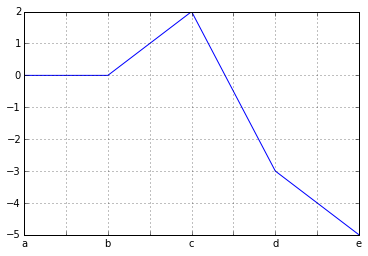

In [48]:
ser_2.plot()

In [49]:
help(ser_2.plot)

Help on method plot_series in module pandas.tools.plotting:

plot_series(data, kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds) method of pandas.core.series.Series instance
    Make plots of Series using matplotlib / pylab.
    
    Parameters
    ----------
    data : Series
    
    kind : str
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        
    ax : matplotlib axes object
        If not passed, uses gca()
    figsize : a tuple (width, height) in inches
    use_index : bo

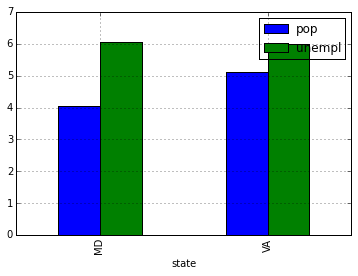

In [50]:
df_1.groupby("state").mean()[["pop", "unempl"]].plot(kind="bar")

#####Exercises

1) Explore the boston housing dataset

In [51]:
from sklearn.datasets import load_boston
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston["feature_names"])
dataset["MEDV"] = boston["target"]

In [52]:
print boston["DESCR"]

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [53]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
